AIM: To train LeNet model from scratch.

In [ ]:
# Note: Comment or delete the current code block if dataset is loaded from local disk.
# loading dataset from kaggle
# upload kaggle.json file
! pip install -q kaggle
from google.colab import files
print("Upload 'kaggle.json' file...")
files.upload()

# download the dataset(zipped folder) and unzip it
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download alessiocorrado99/animals10
! unzip animals10.zip

In [ ]:
# Note: Load the class files into current working directory.
# importing required libraries
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

from keras.callbacks import ModelCheckpoint

from imutils import paths
import matplotlib.pyplot as plt
import os

import lenet # class file
import helper_functions # class file

In [ ]:
# defining image size and batch size
batch_size=64
image_width=224
image_height=224

In [ ]:
# getting output class labels and calculating class weight
class_labels = sorted(os.listdir('raw-img')) # get class labels
print('\nClass Labels: {}'.format(class_labels))
num_classes = len(class_labels) # get number of output classes
print('\nNumber of Classes: {}'.format(num_classes))

# calculating total elements in each class
class_totals = [len(os.listdir('raw-img' + f"/{label}")) for label in class_labels]
print("\nTotal Elements in Each Class : {}".format(class_totals))

# calculate class weight
class_weight = {i:round((max(class_totals) / class_total), 3) for i, class_total in enumerate(class_totals)}
print('\nClass Weight: {}'.format(class_weight))


Class Labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

Number of Classes: 10

Total Elements in Each Class : [4863, 2623, 1446, 2112, 3098, 1668, 1866, 1820, 4821, 1862]

Class Weight: {0: 1.0, 1: 1.854, 2: 3.363, 3: 2.303, 4: 1.57, 5: 2.915, 6: 2.606, 7: 2.672, 8: 1.009, 9: 2.612}


In [ ]:
# get image paths and move them into train and validation directories
imagePaths = list(paths.list_images("raw-img")) # getting path to the directory of images
print('Processing...')
helper_functions.move_images(imagePaths=imagePaths) # calling function
print('Completed...')

Processing...
Completed...


In [ ]:
# get training dataset
train_ds = image_dataset_from_directory(
  "train_dir/", label_mode='categorical', seed=42, shuffle=True,
  image_size=(image_height, image_width),
  batch_size=batch_size)

# get validation dataset
val_ds = image_dataset_from_directory(
  "valid_dir/", label_mode='categorical', seed=42, shuffle=True,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 18325 files belonging to 10 classes.
Found 7854 files belonging to 10 classes.


In [ ]:
# using buffered prefetching
shuffle_size = len(train_ds) # shuffles entire train dataset at each epoch

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(shuffle_size).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Model:**

       INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC => RELU => FC => SOFTMAX

Observations:



1.   Trainable parameters: 78,432,080.
2.   Model is performing poorly on validation dataset.



      

Model Summary...
Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 20)      1520      
                                                                 
 activation_4 (Activation)   (None, 224, 224, 20)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 20)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 50)      25050     
                                                                 
 activation_5 (Activation)   (None, 112, 112, 50)      0         
                                            

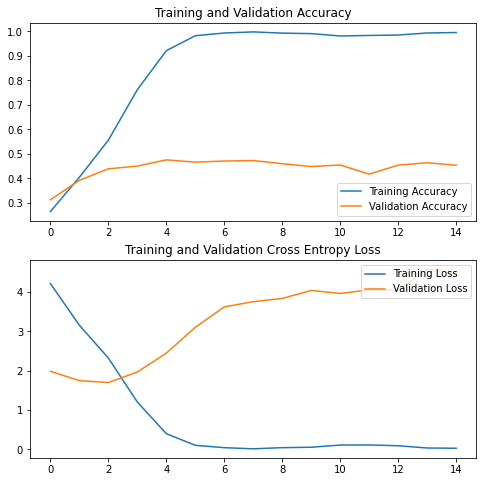

In [ ]:
# defining model architecture, subsequent training, and plotting graphs
# building the model
model = lenet.LeNet.build(width=image_width, height=image_height, depth=3,
                          classes=num_classes)

# compiling and summarizing the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
print('Model Summary...')
model.summary()

# defining callback - checkpoint
checkpoint = ModelCheckpoint('Models/LeNet_Basic/lenet_basic_{epoch:02d}_{val_loss:.3f}.h5', monitor='val_loss', 
                             mode='min', verbose=0, save_freq='epoch')
# total epochs
epochs = 15 

# training the model on defined parameters
print('\n\nModel Training...')
history = model.fit(
  train_ds, validation_data=val_ds, class_weight=class_weight, epochs=epochs, verbose=1,
  batch_size=batch_size, callbacks=[checkpoint] 
)

# plot accuracy and loss graphs of the trained model
print('\n\nModel Graphs...')
fig = helper_functions.plot_graphs(history=history)
plt.show()

**Conclusion:**


Model is unable to generalize. 
* Variability in images too high compared to the size of the model.
* Regularization techniques not used.




